In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

c:\Users\p.nikolakopoulos\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\p.nikolakopoulos\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [2]:
import pandas as pd
import os # Εισάγουμε τη βιβλιοθήκη os για να χειριστούμε σωστά τα paths

# Η μεταβλητή 'path' περιέχει τον φάκελο, όπως είχαμε πριν
# path = 'C:\\Users\\p.nikolakopoulos\\.cache\\kagglehub\\datasets\\blastchar\\telco-customer-churn\\versions\\1'

# Ορίζουμε το όνομα του αρχείου CSV
file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Συνδυάζουμε τον φάκελο και το όνομα του αρχείου για να φτιάξουμε την πλήρη διαδρομή
full_path = os.path.join(path, file_name)

# Τώρα διαβάζουμε το αρχείο CSV από την πλήρη διαδρομή
df = pd.read_csv(full_path)

# Τυπώνουμε τις πρώτες 5 γραμμές για να δούμε αν όλα πήγαν καλά
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Ελέγχουμε τους τύπους δεδομένων και αν υπάρχουν null τιμές
print(df.info())

# Βλέπουμε ότι η στήλη TotalCharges είναι τύπου 'object' (string), ενώ θα έπρεπε να είναι αριθμητική.
# Ας δούμε γιατί.
print("\nΜοναδικές τιμές στη στήλη TotalCharges που δεν είναι αριθμοί:")
print(df['TotalCharges'][pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Αυτός ο κώδικας λύνει ακριβώς το πρόβλημα που εντόπισες:

# Μετατρέπει το 'TotalCharges' από object σε αριθμό
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Διαχειρίζεται τυχόν σφάλματα που προέκυψαν από τη μετατροπή
df.dropna(subset=['TotalCharges'], inplace=True)

# Μετατρέπει το 'Churn' από object ('Yes'/'No') σε αριθμό (1/0)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

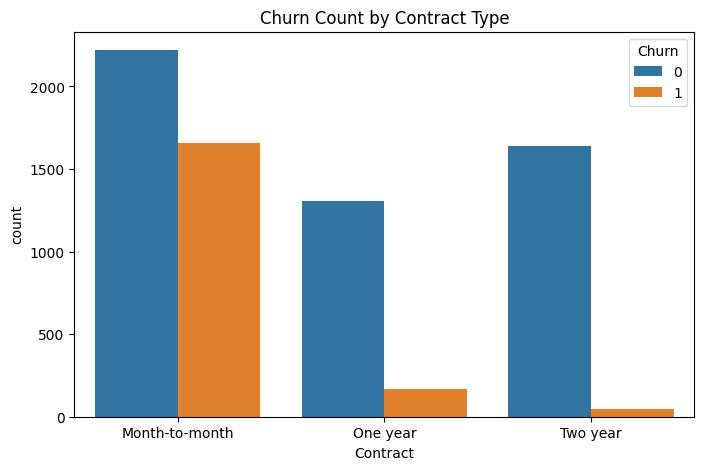

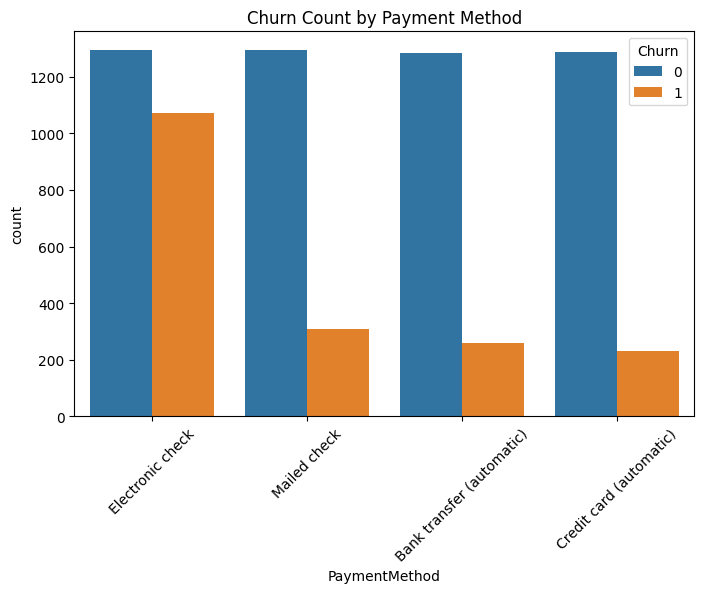

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Πώς επηρεάζει το είδος του συμβολαίου το churn;
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Count by Contract Type')
plt.show()

# Πώς επηρεάζει ο τρόπος πληρωμής το churn;
plt.figure(figsize=(8, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn Count by Payment Method')
plt.xticks(rotation=45)
plt.show()

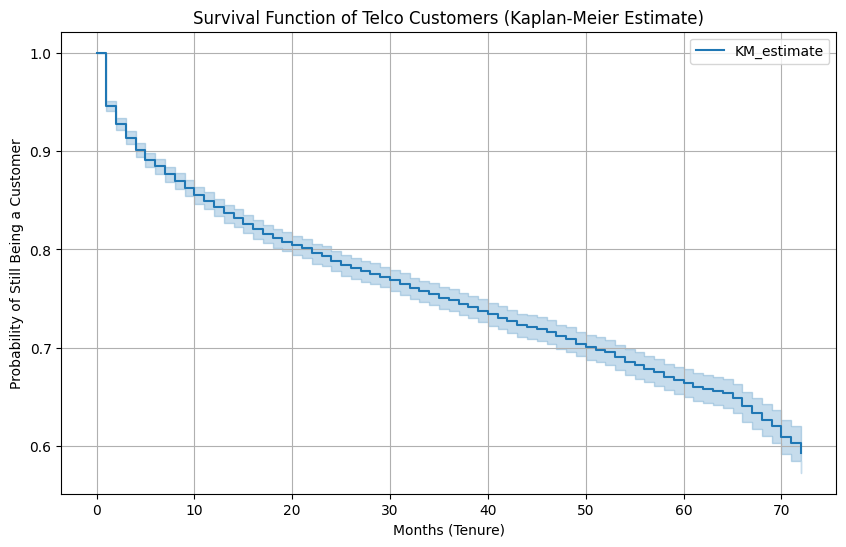

In [8]:
from lifelines import KaplanMeierFitter

# Οι δύο στήλες που χρειαζόμαστε
T = df['tenure']      # Time to event
E = df['Churn']       # Event observed (1 if churned, 0 if not)

# Δημιουργούμε ένα αντικείμενο KaplanMeierFitter
kmf = KaplanMeierFitter()

# "Εκπαιδεύουμε" το μοντέλο με τα δεδομένα μας
kmf.fit(T, event_observed=E)

# Δημιουργούμε το γράφημα
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Survival Function of Telco Customers (Kaplan-Meier Estimate)')
plt.xlabel('Months (Tenure)')
plt.ylabel('Probability of Still Being a Customer')
plt.grid()
plt.show()

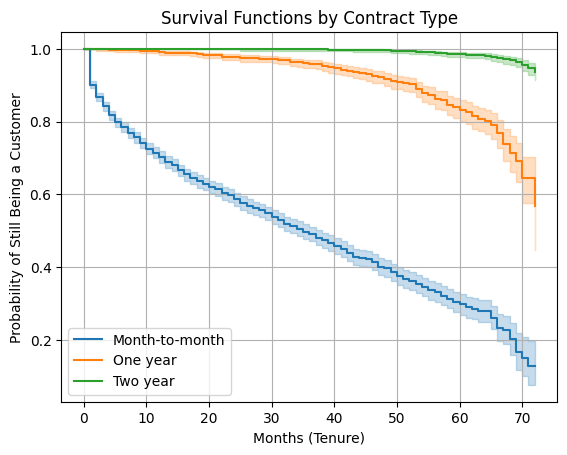

In [9]:
# Δημιουργούμε ένα γράφημα για να βάλουμε τις καμπύλες
ax = plt.subplot(111)

# Για κάθε τύπο συμβολαίου
for contract_type in df['Contract'].unique():
    # Φιλτράρουμε τα δεδομένα για αυτόν τον τύπο
    mask = df['Contract'] == contract_type
    
    # Δημιουργούμε και εκπαιδεύουμε ένα νέο KMF μοντέλο
    kmf.fit(T[mask], event_observed=E[mask], label=contract_type)
    
    # Το προσθέτουμε στο ίδιο γράφημα
    kmf.plot_survival_function(ax=ax)

plt.title('Survival Functions by Contract Type')
plt.xlabel('Months (Tenure)')
plt.ylabel('Probability of Still Being a Customer')
plt.grid()
plt.show()

In [11]:
from lifelines import CoxPHFitter

# Βήμα 1: Προετοιμασία του DataFrame (αυτό το είχες ήδη κάνει)
# Επιλέγουμε τις στήλες που θέλουμε να χρησιμοποιήσουμε στο μοντέλο.
df_cox = df.drop("customerID", axis=1)

# Μετατρέπουμε τις κατηγορικές μεταβλητές σε dummy variables (One-Hot Encoding)
df_cox_dummies = pd.get_dummies(df_cox, drop_first=True)

print("Δημιουργήθηκε το DataFrame για το μοντέλο Cox. Οι πρώτες γραμμές είναι:")
print(df_cox_dummies.head())
print("-" * 50) # Μια γραμμή για να ξεχωρίζουν τα αποτελέσματα


# Βήμα 2: Δημιουργία και εκπαίδευση του μοντέλου με τη διόρθωση
# Δημιουργούμε το μοντέλο CoxPHFitter προσθέτοντας penalizer
cph = CoxPHFitter(penalizer=0.1)

# Το "εκπαιδεύουμε" με τα δεδομένα μας.
print("Εκπαίδευση του μοντέλου Cox Proportional Hazards...")
cph.fit(df_cox_dummies, duration_col='tenure', event_col='Churn')

# Τυπώνουμε τα αποτελέσματα
print("\nΑποτελέσματα Μοντέλου (Summary):")
cph.print_summary()


Δημιουργήθηκε το DataFrame για το μοντέλο Cox. Οι πρώτες γραμμές είναι:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -13927.38
         time fit was run = 2025-09-15 10:14:47 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
SeniorCitizen                          0.05      1.05      0.05           -0.05            0.14                0.95                1.15
MonthlyCharges                         0.00      1.00      0.00            0.00            0.01                1.00                1.01
TotalCharges                          -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
gender_Male                           -0.03      0.97      0.04           -0.11            0.04                0.89                1.04
Partner_Yes                           -0.31      0.73      0.04           -0.39           -0.23                0.67                0.80
Dependents_Yes                        -0.15      0.86      0.05           -0.25           -0.05                0.78                0.95
PhoneService_Yes                       0.11      1.12      0.10           -0.08            0.31                0.92                1.36
MultipleLines_No phone service        -0.11      0.90      0.10           -0.31            0.08                0.74                1.09
MultipleLines_Yes                     -0.15      0.86      0.04           -0.24           -0.07                0.79                0.94
InternetService_Fiber optic            0.47      1.60      0.05            0.37            0.58                1.45                1.78
InternetService_No                    -0.22      0.80      0.09           -0.39           -0.06                0.68                0.95
OnlineSecurity_No internet service    -0.22      0.80      0.09           -0.39           -0.06                0.68                0.95
OnlineSecurity_Yes                    -0.43      0.65      0.05           -0.52           -0.33                0.59                0.72
OnlineBackup_No internet service      -0.22      0.80      0.09           -0.39           -0.06                0.68                0.95
OnlineBackup_Yes                      -0.31      0.73      0.04           -0.40           -0.23                0.67                0.80
DeviceProtection_No internet service  -0.22      0.80      0.09           -0.39           -0.06                0.68                0.95
DeviceProtection_Yes                  -0.18      0.83      0.05           -0.27           -0.09                0.76                0.91
TechSupport_No internet service       -0.22      0.80      0.09           -0.39           -0.06                0.68                0.95
TechSupport_Yes                       -0.34      0.71      0.05           -0.43           -0.24                0.65                0.79
StreamingTV_No internet service       -0.22      0.80      0.09           -0.39           -0.06                0.68                0.95
StreamingTV_Yes                        0.04      1.04      0.04           -0.05            0.12                0.95                1.13
StreamingMovies_No internet service   -0.22      0.80      0.09           -0.39           -0.06                0.68                0.95
StreamingMovies_Yes                    0.01      1.01      0.04           -0.08            0.10                0.92                1.10
Contract_One year                     -0.67      0.51      0.06           -0.78           -0.55                0.46                0.58
Contract_Two year                  

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Ορίζουμε τα χαρακτηριστικά (X) και τον στόχο (y)
X = df_cox_dummies.drop('Churn', axis=1) # Όλες οι στήλες εκτός από το Churn
y = df_cox_dummies['Churn']             # Μόνο η στήλη Churn

# Διαχωρίζουμε τα δεδομένα σε training set (για να εκπαιδεύσουμε το μοντέλο) και test set (για να το αξιολογήσουμε)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Δημιουργούμε το μοντέλο Logistic Regression
logmodel = LogisticRegression(max_iter=1000) # Αυξάνουμε το max_iter για να είμαστε σίγουροι ότι θα συγκλίνει

# Εκπαιδεύουμε το μοντέλο με τα δεδομένα εκπαίδευσης
logmodel.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [13]:
# Κάνουμε προβλέψεις στα δεδομένα που το μοντέλο δεν έχει ξαναδεί (το test set)
predictions = logmodel.predict(X_test)

# Τυπώνουμε το classification report που μας δείχνει precision, recall, f1-score
print("Classification Report:")
print(classification_report(y_test, predictions))

# Τυπώνουμε το confusion matrix για να δούμε πόσα True Positives, True Negatives, False Positives, False Negatives έχουμε
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.54      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110


Confusion Matrix:
[[1377  172]
 [ 260  301]]


Εκτελώντας 5-Fold Cross-Validation με XGBoost...


c:\Users\p.nikolakopoulos\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:18:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\p.nikolakopoulos\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:18:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\p.nikolakopoulos\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:18:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parame

Scores για κάθε fold: [0.77114428 0.7761194  0.74751067 0.76031294 0.76102418]
Μέση Accuracy (XGBoost): 0.7632
Τυπική Απόκλιση (XGBoost): 0.0099

Accuracy του προηγούμενου Logistic Regression μοντέλου: 0.80

Εκπαίδευση του τελικού XGBoost μοντέλου για να δούμε το Feature Importance...


c:\Users\p.nikolakopoulos\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:18:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x800 with 0 Axes>

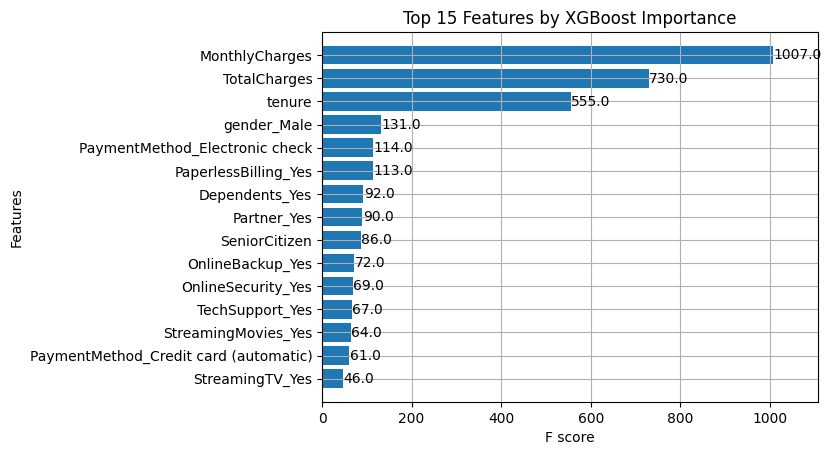

In [14]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# ---------------------------------------------------------------------------
# Βήμα 5.1: Αξιολόγηση του XGBoost με Cross-Validation
# ---------------------------------------------------------------------------

# Δημιουργούμε το μοντέλο XGBoost Classifier. 
# Το scale_pos_weight είναι πολύ χρήσιμο σε imbalanced datasets όπως το δικό μας (έχουμε λιγότερα 'Yes' Churn από 'No').
# Υπολογίζεται ως (αριθμός αρνητικών παραδειγμάτων / αριθμός θετικών παραδειγμάτων)
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

# Χρησιμοποιούμε τα ίδια δεδομένα X και y που φτιάξαμε για τη Logistic Regression
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, scale_pos_weight=scale_pos_weight, random_state=42)

# Ορίζουμε τη στρατηγική του Cross-Validation.
# StratifiedKFold είναι καλύτερο για προβλήματα classification γιατί διατηρεί την αναλογία των κλάσεων σε κάθε "fold".
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Εκτελώντας 5-Fold Cross-Validation με XGBoost...")

# Εκτελούμε το cross-validation. Θα μετρήσουμε την ακρίβεια (accuracy).
# Το cross_val_score θα εκπαιδεύσει και θα τεστάρει το μοντέλο 5 φορές.
scores = cross_val_score(xgb_model, X, y, cv=kfold, scoring='accuracy')

print(f"Scores για κάθε fold: {scores}")
print(f"Μέση Accuracy (XGBoost): {np.mean(scores):.4f}")
print(f"Τυπική Απόκλιση (XGBoost): {np.std(scores):.4f}")

# Συγκρίνουμε με την accuracy του Logistic Regression που ήταν περίπου 0.80
print("\nAccuracy του προηγούμενου Logistic Regression μοντέλου: 0.80")


# ---------------------------------------------------------------------------
# Βήμα 5.2: Feature Importance - Ποια χαρακτηριστικά είναι πιο σημαντικά;
# ---------------------------------------------------------------------------

# Για να δούμε το feature importance, πρέπει να εκπαιδεύσουμε το μοντέλο μία φορά σε όλα τα δεδομένα εκπαίδευσης
print("\nΕκπαίδευση του τελικού XGBoost μοντέλου για να δούμε το Feature Importance...")
xgb_model.fit(X_train, y_train)

# Δημιουργούμε ένα γράφημα με τα πιο σημαντικά features
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_model, max_num_features=15, height=0.8)
plt.title('Top 15 Features by XGBoost Importance')
plt.show()


Ας δούμε τι μας λέει το γράφημα του XGBoost και πώς ταιριάζει με τα ευρήματα του Survival Analysis:

Top 3 Features στο XGBoost: MonthlyCharges, TotalCharges, tenure.

Ερμηνεία: Το μοντέλο πρόβλεψης στηρίζεται κυρίως σε αυτά τα τρία χαρακτηριστικά για να αποφασίσει. Είναι λογικό: πελάτες που πληρώνουν πολλά κάθε μήνα (MonthlyCharges) και είναι λίγο καιρό στην εταιρεία (tenure) είναι πιο πιθανό να φύγουν.
Σύνδεση: Το tenure ήταν η βασική μεταβλητή χρόνου σε όλο το Survival Analysis. Το ότι είναι τόσο σημαντικό και εδώ, επιβεβαιώνει την κεντρική του σημασία.
Σύγκριση με το Cox Model:

Το XGBoost ανέδειξε το MonthlyCharges ως το Νο1. Το Cox model δεν το είχε τόσο ψηλά, αλλά το έδειχνε στατιστικά σημαντικό.
Και τα δύο μοντέλα συμφωνούν ότι παράγοντες όπως το PaymentMethod_Electronic check είναι σημαντικοί.
Το πιο ενδιαφέρον είναι ότι το Cox model ανέδειξε το Contract ως έναν παράγοντα με τεράστια επίδραση στον κίνδυνο. Το XGBoost δεν το έχει μέσα στο top 15. Αυτό δεν είναι λάθος! Σημαίνει ότι το Contract μπορεί να μην είναι το καλύτερο μεμονωμένο feature για πρόβλεψη, αλλά είναι ο καλύτερος παράγοντας για να καταλάβουμε τη μακροπρόθεσμη συμπεριφορά και τον κίνδυνο.

# τελικη ερμηνεια και σχολια για το project

Σκοπός του Project: Ανάλυση του customer churn χρησιμοποιώντας δύο μεθόδους: Survival Analysis για την κατανόηση του χρόνου μέχρι το churn, και Machine Learning για την πρόβλεψη του churn.

Dataset: Αναφορά στο Telco Customer Churn dataset από το Kaggle (με link).

Μεθοδολογία:

Survival Analysis:
Χρησιμοποιήθηκαν Kaplan-Meier curves για την οπτικοποίηση της πιθανότητας επιβίωσης.
Εφαρμόστηκε το μοντέλο Cox Proportional Hazards για τον προσδιορισμό των παραγόντων που επηρεάζουν τον κίνδυνο (hazard) του churn.
Machine Learning:
Συγκρίθηκαν δύο μοντέλα: Logistic Regression (ως baseline) και XGBoost Classifier.
Η αξιολόγηση έγινε με 5-fold Cross-Validation για πιο αξιόπιστα αποτελέσματα.
Βασικά Ευρήματα & Συμπεράσματα:

Από το Survival Analysis: "Το είδος του συμβολαίου είναι ο πιο κρίσιμος παράγοντας που καθορίζει τη μακροπρόθεσμη παραμονή ενός πελάτη. Τα διετή συμβόλαια μειώνουν δραματικά τον κίνδυνο churn." (Μπορείς να βάλεις και το γράφημα με τις καμπύλες στο README).
Από το Machine Learning: "Το μοντέλο XGBoost πέτυχε ακρίβεια ΧΧ% (βάλε τη μέση ακρίβεια που βρήκες) στην πρόβλεψη. Τα πιο σημαντικά χαρακτηριστικά για την πρόβλεψη είναι οι μηνιαίες χρεώσεις, οι συνολικές χρεώσεις και η διάρκεια παραμονής (tenure)." (Βάλε το γράφημα του feature importance).
Συνδυαστικό Συμπέρασμα: "Ενώ οι χρεώσεις και η διάρκεια παραμονής είναι οι καλύτεροι προγνωστικοί δείκτες για το αν κάποιος θα φύγει άμεσα, η δομή του συμβολαίου είναι ο πιο στρατηγικός παράγοντας για τη διατήρηση των πελατών μακροπρόθεσμα."